<a href="https://colab.research.google.com/github/ErikaYosepinS/Wine-Dataset/blob/main/Wine%20Recognition%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
from sklearn.datasets import load_wine
import pandas as pd

# Load dataset
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

# Simpan ke CSV
df.to_csv('wine_dataset.csv', index=False)
print("Dataset berhasil disimpan sebagai wine_dataset.csv")

Dataset berhasil disimpan sebagai wine_dataset.csv


In [58]:
import pandas as pd

# Ganti dengan URL raw dataset Anda dari GitHub
url = "https://github.com/ErikaYosepinS/Wine-Dataset/raw/refs/heads/main/wine_dataset.csv"

# Load dataset
data = pd.read_csv(url)

# Tampilkan 5 baris pertama
print(data.head())

# Cek informasi dataset
print("\nInfo Dataset:\n")
print(data.info())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Pisahkan fitur (X) dan target (y)
X = data.drop(columns=['target'])  # Semua kecuali target
y = data['target']  # Kolom target

# Split dataset menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [62]:
from sklearn.model_selection import train_test_split

# Pisahkan fitur (X) dan target (y)
X = data.drop(columns=['target'])  # Semua kolom kecuali target
y = data['target']  # Kolom target

# Split dataset menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cek hasil splitting
print(f"Training data: {X_train.shape}, Testing data: {X_test.shape}")

Training data: (142, 13), Testing data: (36, 13)


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Model Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Model KNN (dengan k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Model SVM
svm = SVC(kernel='linear')  # Kernel linear agar hasilnya bisa dibandingkan dengan Logistic Regression
svm.fit(X_train, y_train)

print("Ketiga model berhasil dilatih!")

Ketiga model berhasil dilatih!



=== Logistic Regression ===

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


Confusion Matrix:


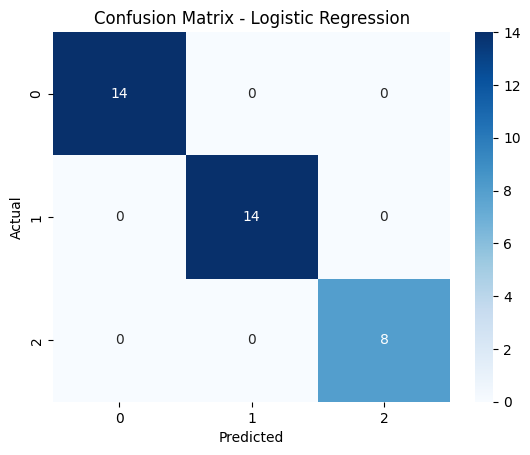

Model Accuracy: 1.00

=== K-Nearest Neighbors ===

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.86      0.92        14
           2       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36


Confusion Matrix:


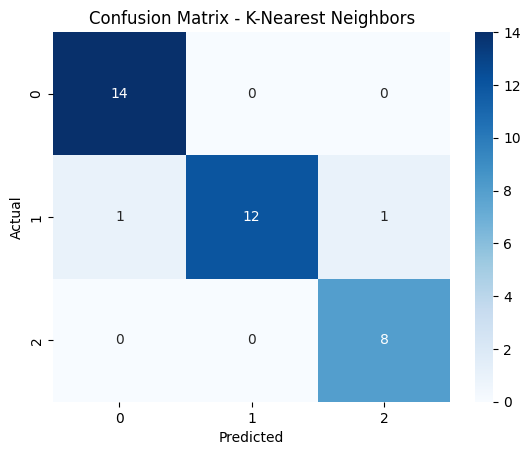

Model Accuracy: 0.94

=== Support Vector Machine ===

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.93      0.96        14
           2       0.89      1.00      0.94         8

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36


Confusion Matrix:


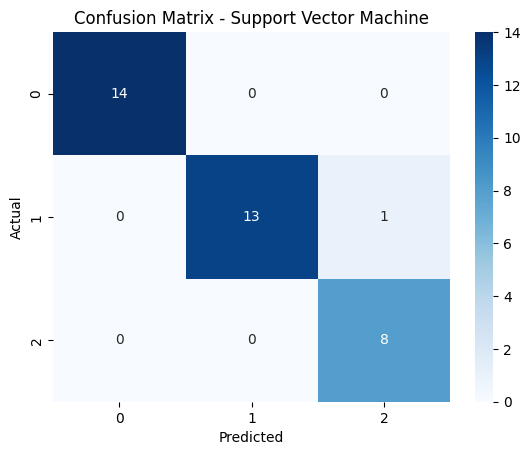

Model Accuracy: 0.97


In [61]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Prediksi
y_pred_log_reg = log_reg.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_svm = svm.predict(X_test)

# Evaluasi fungsi
def evaluate_model(model_name, y_test, y_pred):
    print(f"\n=== {model_name} ===")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {accuracy:.2f}")

# Evaluasi setiap model
evaluate_model("Logistic Regression", y_test, y_pred_log_reg)
evaluate_model("K-Nearest Neighbors", y_test, y_pred_knn)
evaluate_model("Support Vector Machine", y_test, y_pred_svm)

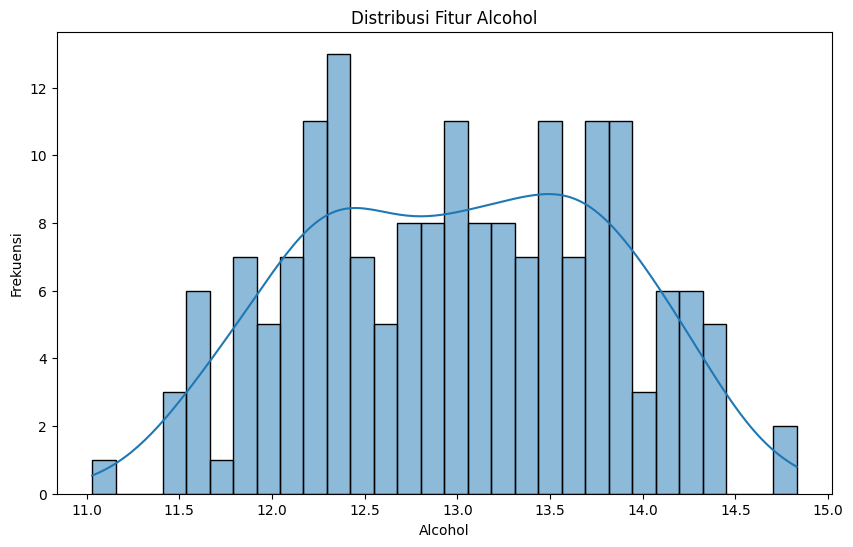

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi fitur menggunakan histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['alcohol'], kde=True, bins=30)  # Ganti 'alcohol' dengan fitur lain sesuai kebutuhan
plt.title('Distribusi Fitur Alcohol')
plt.xlabel('Alcohol')
plt.ylabel('Frekuensi')
plt.show()

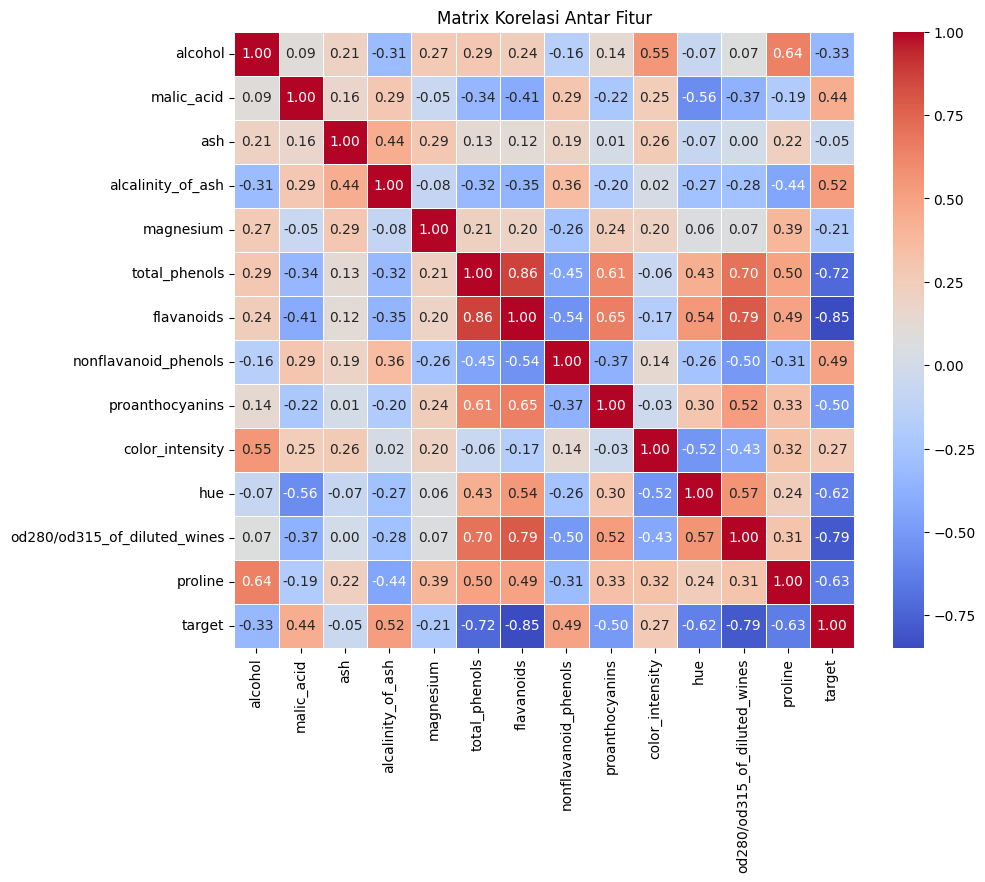

In [66]:
# Korelasi antar fitur
correlation_matrix = data.corr()

# Visualisasi korelasi menggunakan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrix Korelasi Antar Fitur')
plt.show()

In [71]:
# Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_wine

# Load dataset (gunakan dataset Wine dari scikit-learn sebagai contoh)
data = load_wine()
X = data.data
y = data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the models
log_reg = LogisticRegression(max_iter=10000)
knn = KNeighborsClassifier()
svm = SVC()

# Fit the models
log_reg.fit(X_train, y_train)
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Predict the outcomes
log_reg_pred = log_reg.predict(X_test)
knn_pred = knn.predict(X_test)
svm_pred = svm.predict(X_test)

# Calculate accuracy for each model
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)

# Print out the accuracies
print(f"Logistic Regression Accuracy: {log_reg_accuracy:.4f}")
print(f"K-Nearest Neighbors Accuracy: {knn_accuracy:.4f}")
print(f"Support Vector Machine Accuracy: {svm_accuracy:.4f}")

# Find the best model
accuracies = {'Logistic Regression': log_reg_accuracy, 'K-Nearest Neighbors': knn_accuracy, 'Support Vector Machine': svm_accuracy}
best_model = max(accuracies, key=accuracies.get)
print(f"The best model is: {best_model} with an accuracy of {accuracies[best_model]:.4f}")

Logistic Regression Accuracy: 1.0000
K-Nearest Neighbors Accuracy: 0.7407
Support Vector Machine Accuracy: 0.7593
The best model is: Logistic Regression with an accuracy of 1.0000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


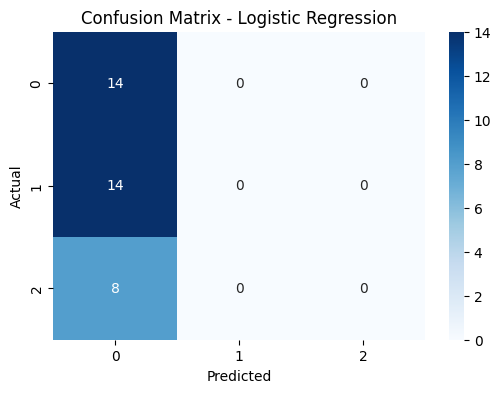

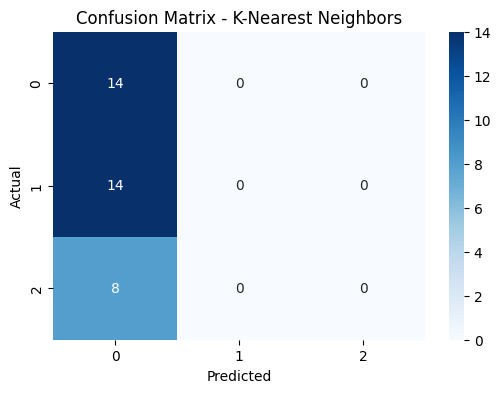

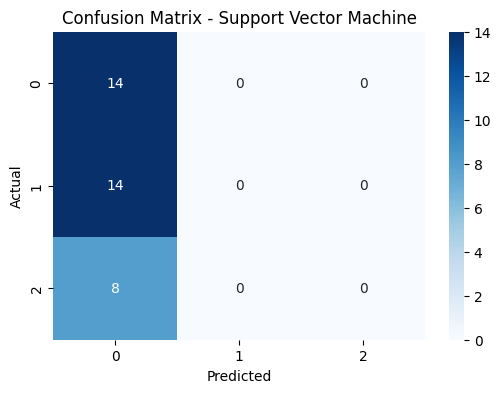

In [67]:
from sklearn.metrics import confusion_matrix

# Prediksi dengan model
y_pred_log_reg = log_reg.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_svm = svm.predict(X_test)

# Visualisasi confusion matrix untuk setiap model
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Plot untuk masing-masing model
plot_confusion_matrix(y_test, y_pred_log_reg, 'Logistic Regression')
plot_confusion_matrix(y_test, y_pred_knn, 'K-Nearest Neighbors')
plot_confusion_matrix(y_test, y_pred_svm, 'Support Vector Machine')

<ipython-input-68-93ddb9f8d535>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


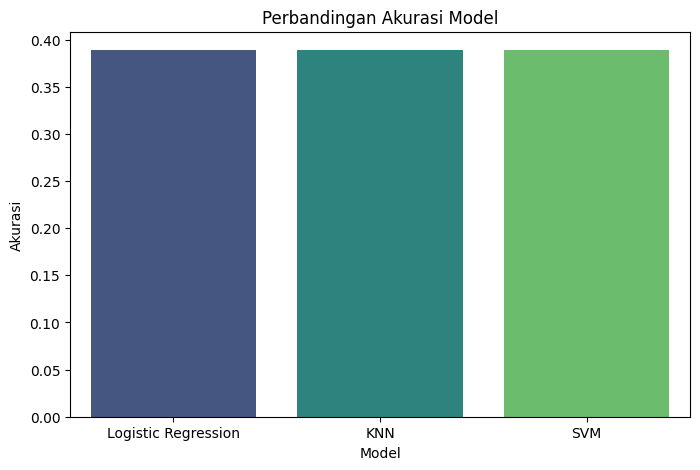

In [68]:
# Akurasi setiap model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Visualisasi perbandingan akurasi
models = ['Logistic Regression', 'KNN', 'SVM']
accuracies = [accuracy_log_reg, accuracy_knn, accuracy_svm]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title('Perbandingan Akurasi Model')
plt.ylabel('Akurasi')
plt.xlabel('Model')
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

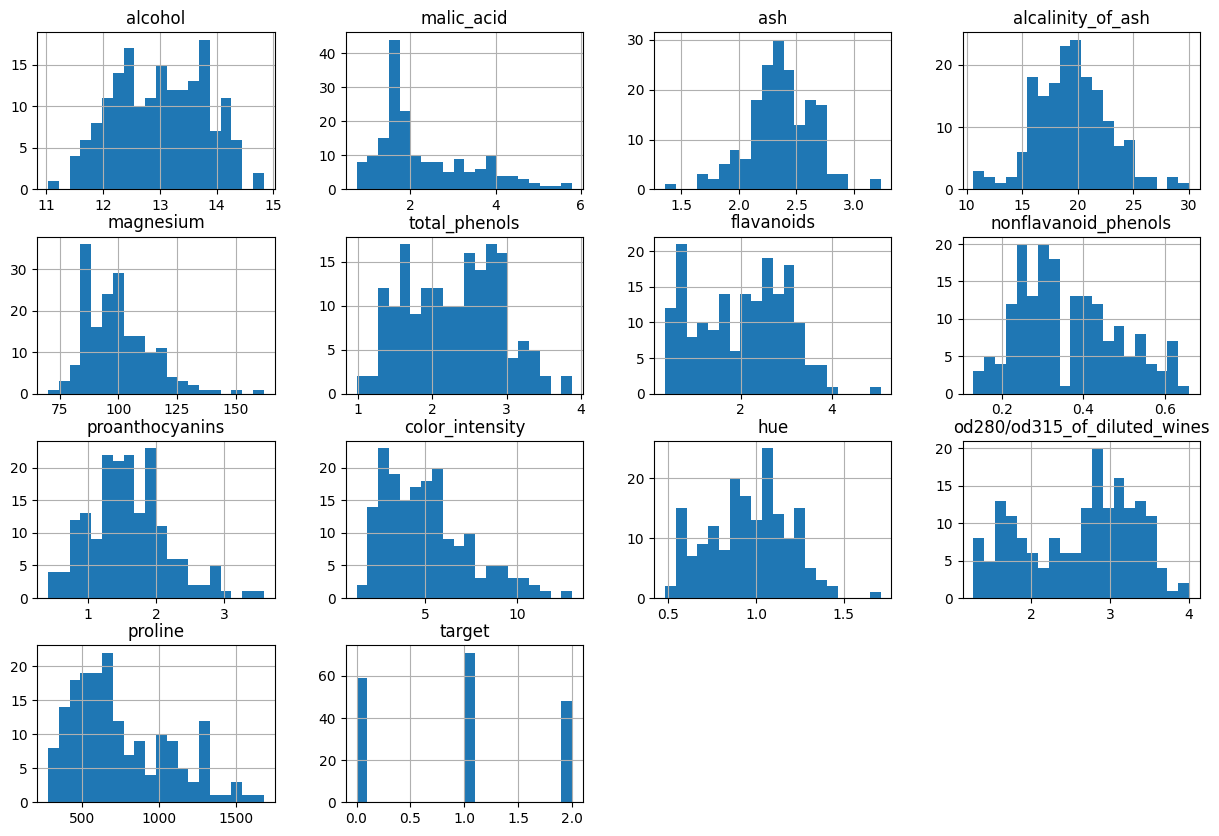

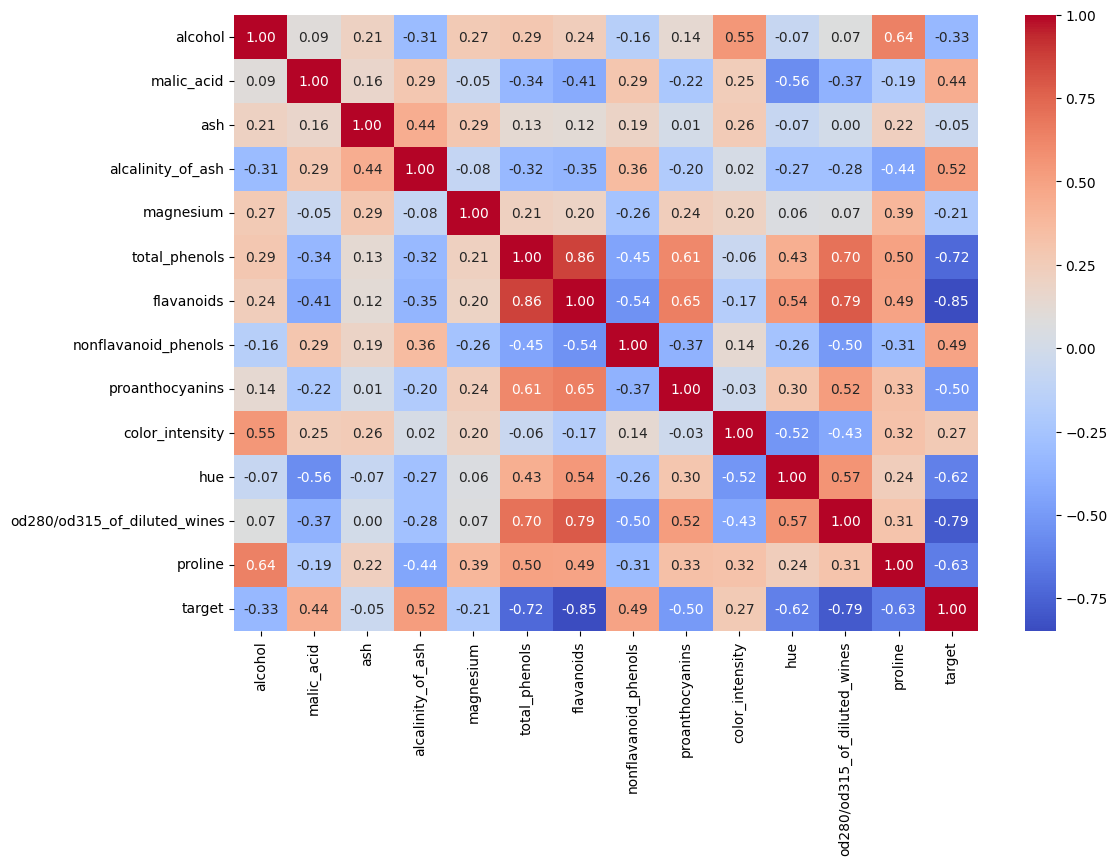

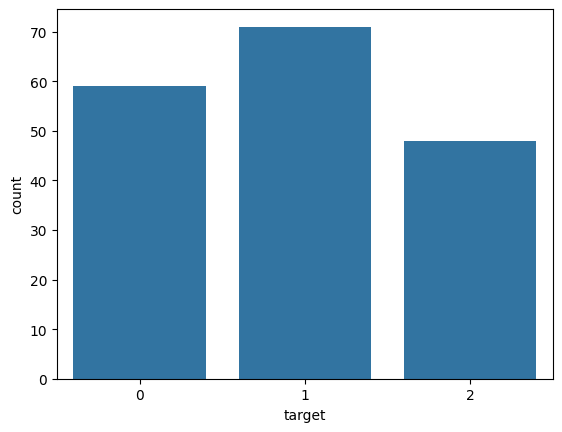

In [70]:
# Import dataset wine
from sklearn.datasets import load_wine
import pandas as pd

# Load wine dataset
wine = load_wine()
data = pd.DataFrame(wine.data, columns=wine.feature_names)
data['target'] = wine.target

# Menampilkan informasi dataset
print(data.info())
print(data.describe())

# Mengecek missing values
print(data.isnull().sum())

# Visualisasi distribusi fitur
data.hist(bins=20, figsize=(15,10))
plt.show()

# Visualisasi korelasi antar fitur
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# Visualisasi distribusi target
sns.countplot(x='target', data=data)
plt.show()